In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [3]:
data = pd.read_csv("./data.csv")
data.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
data.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [5]:
data =data.drop("Unnamed: 0", axis=1)
data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
nltk_download_dir="/home/aadityapal/.conda/envs/notebook/nltk_data"

In [7]:

nltk.download("punkt_tab",download_dir=nltk_download_dir)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
data["status"].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

In [9]:
data.isna().sum()

statement    362
status         0
dtype: int64

In [10]:
data = data.dropna()

# Tokenizer

In [11]:
word_list =[]
for word in data["statement"]:
    word_list.append(word_tokenize(word))

data["word"]=word_list
data.head()

,statement,status,word
0,oh my gosh,Anxiety,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d..."
3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el..."
4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be..."


## remove punctuation

In [12]:
no_punct=[]
for word in data["statement"]:
    no_punct.append(RegexpTokenizer("[A-Z]|[a-z]+").tokenize(word.lower()))
data["no_punct_word"]=no_punct
data.head()

,statement,status,word,no_punct_word
0,oh my gosh,Anxiety,"[oh, my, gosh]","[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ..."
3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els..."
4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a..."


In [13]:
nltk.download("stopwords", download_dir=nltk_download_dir)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
no_stop_words = []
for wordArr in data["no_punct_word"]:
    currentRow=[]
    for word in wordArr:
        if word not in stopwords.words("english"):
            currentRow.append(word)
    no_stop_words.append(currentRow)
data["no_stopword"]=no_stop_words
data.head()

,statement,status,word,no_punct_word,no_stopword
0,oh my gosh,Anxiety,"[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]"
4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]"


In [15]:
#lemmatization

In [16]:
nltk.download("wordnet", download_dir=nltk_download_dir)

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
word_lemma=[]
for wordArr in data["no_stopword"]:
    row=[]
    for word in wordArr:
        row.append(WordNetLemmatizer().lemmatize(word))
    word_lemma.append(row)
data["word_lemma"]=word_lemma
data.head()

,statement,status,word,no_punct_word,no_stopword,word_lemma
0,oh my gosh,Anxiety,"[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]","[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]"
4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]"


In [18]:
nltk.download("averaged_perceptron_tagger_eng", download_dir=nltk_download_dir)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [19]:
word_tag =[]
for wordArr in data["word_lemma"]:
    word_tag.append(nltk.pos_tag(wordArr))
data["pos_tag"]= word_tag
data.head()

,statement,status,word,no_punct_word,no_stopword,word_lemma,pos_tag
0,oh my gosh,Anxiety,"[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]","[oh, gosh]","[(oh, UH), (gosh, NN)]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[(trouble, NN), (sleeping, VBG), (confused, VB..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[(wrong, JJ), (back, RB), (dear, JJ), (forward..."
3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[(shifted, VBN), (focus, NN), (something, NN),..."
4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[(restless, JJ), (restless, JJ), (month, NN), ..."


In [20]:
noun_tag=[]
for wordArr in data["pos_tag"]:
    pos_row=[]
    for (word,pos) in wordArr:
        if pos.startswith("NN"):
            pos_row.append(word)
    noun_tag.append(pos_row)
data["noun_tag"]= noun_tag
data.head()

,statement,status,word,no_punct_word,no_stopword,word_lemma,pos_tag,noun_tag
0,oh my gosh,Anxiety,"[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]","[oh, gosh]","[(oh, UH), (gosh, NN)]",[gosh]
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[(trouble, NN), (sleeping, VBG), (confused, VB...","[trouble, mind, heart, tune]"
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[(wrong, JJ), (back, RB), (dear, JJ), (forward...","[forward, doubt, restless, place]"
3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[(shifted, VBN), (focus, NN), (something, NN),...","[focus, something]"
4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[(restless, JJ), (restless, JJ), (month, NN), ...","[month, mean]"


In [21]:
## generate word cloud

In [22]:

wordList =data["noun_tag"].map(lambda x : ",".join(x))
print(wordList)
words=",".join(wordList)
#words

0                                                     gosh
1                                  trouble,mind,heart,tune
2                             forward,doubt,restless,place
3                                          focus,something
4                                               month,mean
                               ...                        
53038    nobody,depression,anxiety,year,people,money,ca...
53039    selfishness,world,ruin,mood,try,people,people,...
53040                                       way,night,help
53041    tip,hi,presentation,work,week,minute,attendanc...
53042    door,anxiety,door,something,door,way,way,peopl...
Name: noun_tag, Length: 52681, dtype: object


In [23]:
wc= WordCloud(background_color="black", max_words=5000, contour_color="blue")
wc.generate(words)


In [24]:
import matplotlib.pyplot as plt

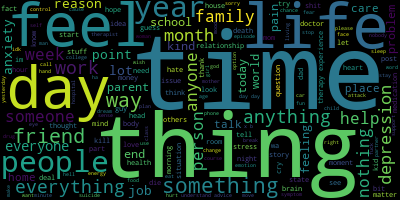

<Figure size 5000x5000 with 0 Axes>

In [25]:
plt.figure(figsize=(50,50))
wc.to_image()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
v1= CountVectorizer().fit_transform(wordList)
v1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(52681, 33163))

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
x_tr,x_test, y_tr, y_test = train_test_split(v1, data["status"], test_size=.2)


In [30]:
logit_mod=LogisticRegression().fit(x_tr, y_tr)

/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
pred=logit_mod.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [33]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

             Anxiety       0.72      0.63      0.67       722
             Bipolar       0.72      0.59      0.65       538
          Depression       0.64      0.63      0.63      3062
              Normal       0.80      0.93      0.86      3327
Personality disorder       0.62      0.47      0.54       229
              Stress       0.51      0.37      0.43       512
            Suicidal       0.59      0.54      0.56      2147

            accuracy                           0.69     10537
           macro avg       0.66      0.60      0.62     10537
        weighted avg       0.68      0.69      0.68     10537



In [34]:
y=LabelEncoder().fit_transform(data["status"])
print(len(y_test))
x_tr,x_test, y_tr,y_test = train_test_split(v1, y, test_size=.2)


10537


In [35]:
logit_mod2= LogisticRegression().fit(x_tr,y_tr)

/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
p2= logit_mod2.predict_proba(x_test)
print(len(y_test))
print(len(p2))

10537
10537


In [37]:
auc=roc_auc_score(y_test, p2,multi_class="ovr")
auc

np.float64(0.8992028763046841)